In [292]:
import warnings
warnings.filterwarnings("ignore")


In [298]:

seed=1324
%run preprocess.ipynb
gb_list=[]


for var in [0]:
    best_score=0
    y_pred_list=[]
    y_score_list=[]
    for train_index, valid_index in folds.split(train, train['Y1']):



        X_train=train.iloc[train_index].drop('Y1',axis=1).fillna(-10)
        X_valid=train.iloc[valid_index].drop('Y1',axis=1).fillna(-10)

        y_train=train.iloc[train_index]['Y1']
        y_valid =train.iloc[valid_index]['Y1']



        pca_train=pca_train_df.iloc[train_index][pca_col].fillna(-0.001)
        pca_valid=pca_train_df.iloc[valid_index][pca_col].fillna(-0.001)
        pca_test=pca_test_df[pca_col].fillna(-0.001)


        pca = PCA(n_components=3)
        pca_train=pca.fit_transform(pca_train) 
        pca_valid=pca.transform(pca_valid)
        pca_test=pca.transform(pca_test)


        idx=0
        X_train.insert(loc=2, column='PCA1',value=pca_train[:,idx])
        X_valid.insert(loc=2, column='PCA1',value=pca_valid[:,idx])
        if 'PCA1' in test:
            test['PCA1']=pca_test[:,idx]
        else:
            test.insert(loc=2, column='PCA1',value=pca_test[:,idx])
        idx=1
        X_train.insert(loc=2, column='PCA2',value=pca_train[:,idx])
        X_valid.insert(loc=2, column='PCA2',value=pca_valid[:,idx])
        if 'PCA2' in test:
            test['PCA2']=pca_test[:,idx]
        else:
            test.insert(loc=2, column='PCA2',value=pca_test[:,idx])

        train_D=lgb.Dataset(X_train,y_train,categorical_feature=cat_col)
        valid_D=lgb.Dataset(X_valid,y_valid,categorical_feature=cat_col)
        params = {'num_leaves': 30, #30
#                   'boosting':'dart',
                  'objective': 'binary', 
                  'metric': 'auc', 
#                   'device_type':'gpu', 
                  'learning_rate':0.01,
                  'colsample_bytree':0.3, 
                  'subsample':0.7, 
                  'max_bin':65,
                  'min_data_in_leaf':6, #4
                  'gpu_use_dp':True,
                  'seed':seed,
                  'lambda_l2':0.1,
                  "n_jobs": 7,
#                   'neg_bagging_fraction':var
                 }

        gbm_2=lgb.train(params, 
                        train_set=train_D, 
                        num_boost_round=100000,
                        early_stopping_rounds=200,
                        verbose_eval=False,
                        valid_sets=[train_D,valid_D])
        y_pred=gbm_2.predict(X_valid)
        best_score+=roc_auc_score(y_valid,y_pred)
        y_pred_list.append(gbm_2.predict(test))
        y_score_list.append(roc_auc_score(y_valid,y_pred))
        gb_list.append(gbm_2)
#         NN_train['lgb'].loc[valid_index]=y_pred
    best_score/=k
    print('var_{} : {}'.format(var,best_score))
final=np.vstack(y_pred_list)

for i in range(y_pred_list[0].shape[0]):
    final[:,i].sort()


sample['Ypred']=sum(y_pred_list)/len(y_pred_list)
sample.to_csv('lgb_{}.csv'.format(best_score),index=False)


preprocess start!
binarized
binarized
preprocess finish!
BernoulliNB
var_0 : 0.8483445408163266


In [213]:
pca.explained_variance_ratio_

array([0.7878616 , 0.11780553, 0.02967868])

In [210]:
final=np.vstack(y_pred_list)

for i in range(y_pred_list[0].shape[0]):
    final[:,i].sort()



sample['Ypred']=final[-1]
sample.to_csv('lgb_{}_max.csv'.format(best_score),index=False)

sample['Ypred']=sum(y_pred_list)/len(y_pred_list)
sample.to_csv('lgb_{}.csv'.format(best_score),index=False)

sample['Ypred']=(y_pred_list[8]+y_pred_list[2]+y_pred_list[4]+y_pred_list[5])/4
sample.to_csv('lgb_{}_4bestavg.csv'.format(best_score),index=False)
sample['Ypred']=1
for i in y_pred_list:
    sample['Ypred']*=i
sample['Ypred']=((sample['Ypred'])**(1/10))
sample.to_csv('lgb_{}_hmean.csv'.format(best_score),index=False)
# sample['Ypred']=0.95*(sum(y_pred_list)/len(y_pred_list))+0.05*NN_test['Ypred']
# sample.to_csv('lgb_{}_NN_95.csv'.format(best_score),index=False)

In [5]:
import os
sample['Ypred']=0
for filename in os.listdir(os.getcwd()+'/final'):
    z=pd.read_csv(os.getcwd()+'/final/'+filename)
    sample['Ypred']+=z['Ypred']
sample['Ypred']=sample['Ypred']/len(os.listdir(os.getcwd()+'/final'))
sample['Ypred'][(sample['Ypred']<0.002)]=0
sample.to_csv('lgb_final_mean_100.csv',index=False)

In [6]:
f=[
'lgb_0.8472170408163265.csv',
'lgb_0.8480097448979592.csv',
'lgb_0.846974719387755.csv',
'lgb_0.8477143112244898.csv',
'lgb_0.8470408163265306.csv']
sample['Ypred']=1
for i in f:
    z=pd.read_csv(i)
    sample['Ypred']*=z['Ypred']
sample['Ypred']=sample['Ypred']**(1/5)
sample.to_csv('lgb_final.csv',index=False)

In [58]:
f=[
'lgb_0.8472170408163265.csv',
'lgb_0.8480097448979592.csv',
'lgb_0.846974719387755.csv',
'lgb_0.8477143112244898.csv',
'lgb_0.8470408163265306.csv',
'lgb_0.8472342857142857.csv',
'lgb_0.8472020153061223.csv']
sample['Ypred']=0
for i in f:
    z=pd.read_csv(i)
    sample['Ypred']+=z['Ypred']
sample['Ypred']=sample['Ypred']/len(f)
sample.to_csv('lgb_final_mean.csv',index=False)

In [81]:
f=[
'lgb_0.8472170408163265.csv',
'lgb_0.8480097448979592.csv',
'lgb_0.846974719387755.csv',
'lgb_0.8477143112244898.csv',
'lgb_0.8470408163265306.csv',
'lgb_0.8472342857142857.csv',
'lgb_0.8472020153061223.csv']
for i in f:
    z=pd.read_csv(i)
    sample['Ypred']+=z['Ypred']
sample['Ypred']=sample['Ypred']/len(f)
sample['Ypred'][(sample['Ypred']<0.002)]=0
sample.to_csv('lgb_final_mean_cut_off.csv',index=False)

In [4]:
explainer = shap.TreeExplainer(gb_list[1])
shap_values = explainer.shap_values(X_train)

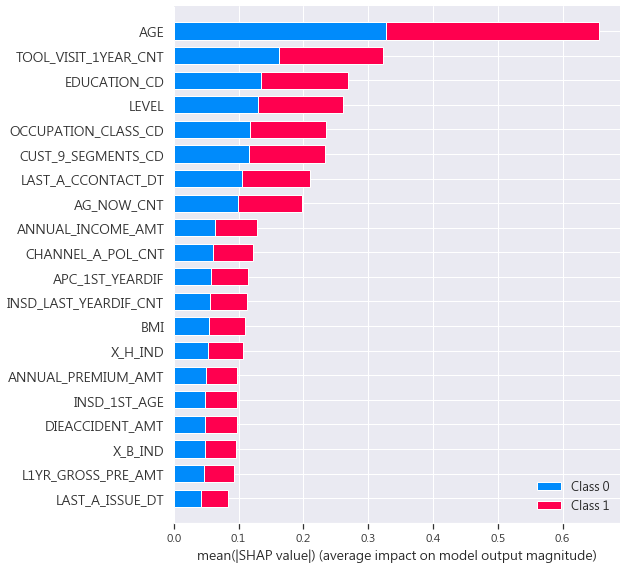

In [207]:

shap.initjs()

# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)

explainer = shap.TreeExplainer(gb_list[1])
shap_values = explainer.shap_values(X_train)
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])
shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=20)

In [ ]:
explainer = shap.TreeExplainer(gb_list[0])
shap_values = explainer.shap_values(X_train)
for i in range(1,10):
    explainer = shap.TreeExplainer(gb_list[i])
    shap_values+=explainer.shap_values(X_train)

In [12]:
shap.summary_plot(shap_values, X_train, plot_type="violin", max_display=30)

AssertionError: Only plot_type = 'bar' is supported for multi-output explanations!

In [223]:
shap_values

AttributeError: 'list' object has no attribute 'shape'

In [225]:
X_train[root_col]

,POLICY_VALUE_AMT,L1YR_GROSS_PRE_AMT,OUTPATIENT_SURGERY_AMT,EXPIRATION_AMT,ACCIDENT_HOSPITAL_REC_AMT,INPATIENT_SURGERY_AMT,ILL_ACCELERATION_AMT,ILL_ADDITIONAL_AMT,DIEBENEFIT_AMT,APC_1ST_YEARDIF,...,INSD_LAST_YEARDIF_CNT,DIEACCIDENT_AMT,ANNUITY_AMT,DISEASES_HOSPITAL_REC_AMT,PAY_LIMIT_MED_MISC_AMT,FIRST_CANCER_AMT,LONG_TERM_CARE_AMT,MONTHLY_CARE_AMT,LIFE_INSD_CNT,L1YR_GROSS_PRE_AMT
0,-10.000000,0.930964,-10.000000,-10.0,-10.000000,-10.000000,-10.0,-10.0,-10.000000,0.756605,...,0.765155,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.000000,0.685175,0.930964
1,-10.000000,0.961571,-10.000000,-10.0,-10.000000,-10.000000,-10.0,-10.0,-10.000000,0.756605,...,0.765155,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.000000,0.685175,0.961571
2,0.000000,0.957706,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.729740,0.957706
3,-10.000000,0.000000,-10.000000,-10.0,-10.000000,-10.000000,-10.0,-10.0,-10.000000,0.847871,...,0.867925,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.000000,0.685175,0.000000
4,0.000000,0.940568,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.822329,...,0.793886,0.000000,0.000000,0.000000,0.000000,0.757572,0.0,0.000000,0.777203,0.940568
5,-10.000000,0.933547,-10.000000,-10.0,-10.000000,-10.000000,-10.0,-10.0,-10.000000,0.858227,...,0.867925,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.000000,0.685175,0.933547
6,-10.000000,0.951999,-10.000000,-10.0,-10.000000,-10.000000,-10.0,-10.0,-10.000000,0.785014,...,0.793886,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.000000,0.685175,0.951999
7,-10.000000,0.952822,-10.000000,-10.0,-10.000000,-10.000000,-10.0,-10.0,-10.000000,0.756605,...,0.765155,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.000000,0.685175,0.952822
8,-10.000000,0.929299,-10.000000,-10.0,-10.000000,-10.000000,-10.0,-10.0,-10.000000,0.822329,...,0.831622,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.000000,0.729740,0.929299
9,-10.000000,0.931316,-10.000000,-10.0,-10.000000,-10.000000,-10.0,-10.0,-10.000000,0.836072,...,0.845521,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.0,-10.000000,0.757141,0.931316


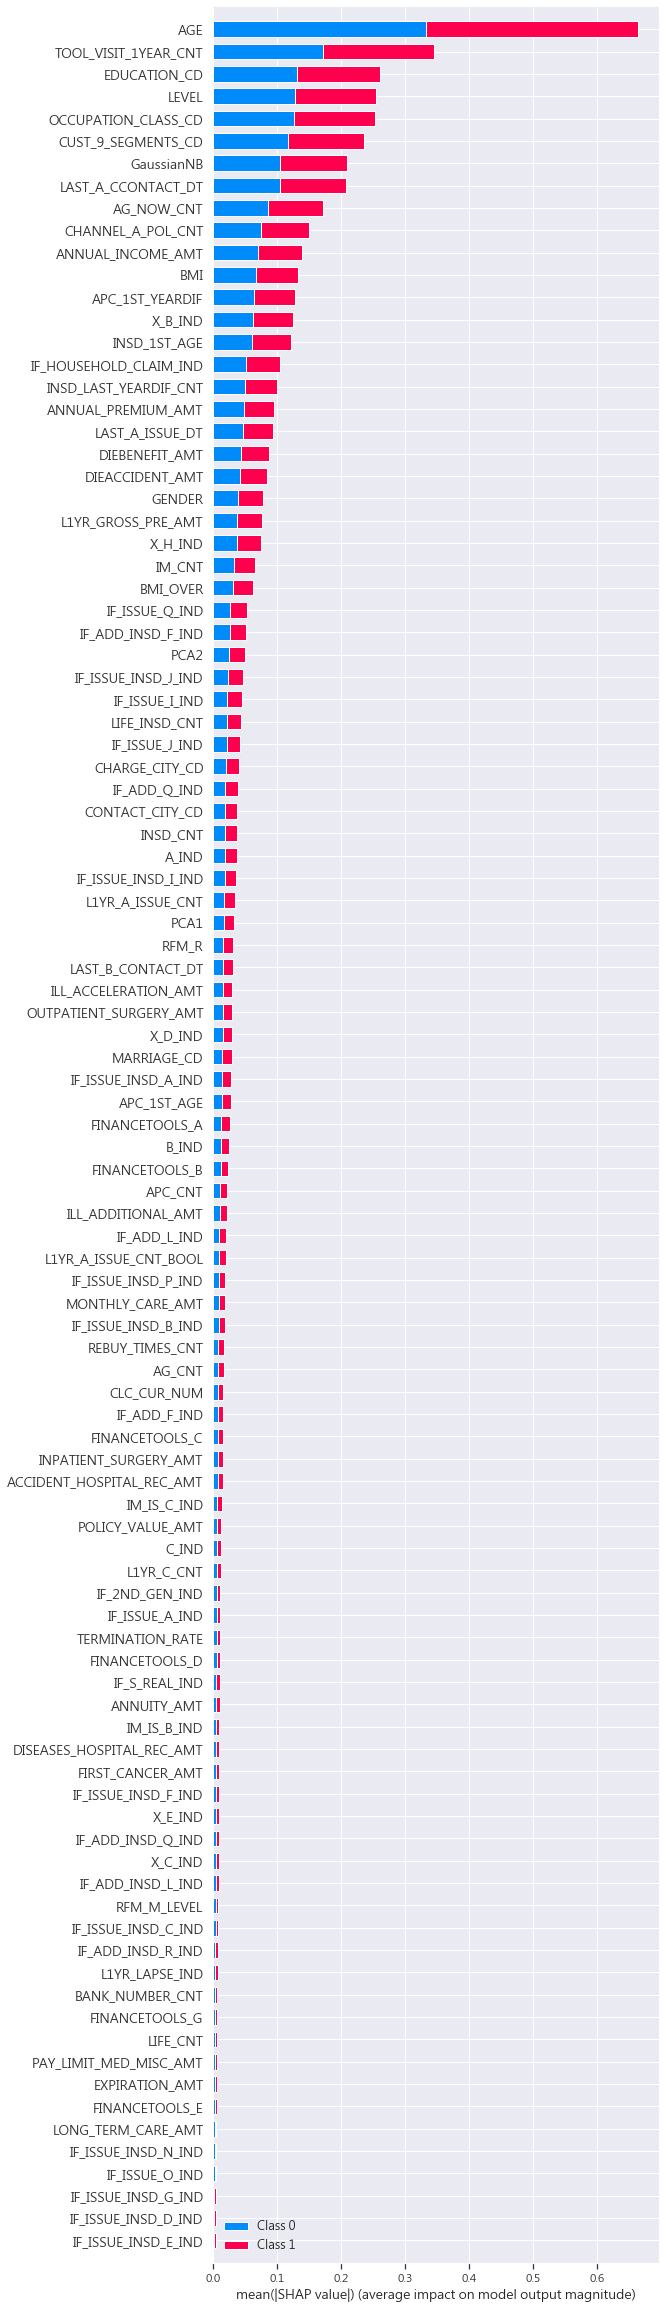

In [264]:

shap.initjs()
# explain the model's predictions using SHAP values
# (same syntax works for LightGBM, CatBoost, and scikit-learn models)
explainer = shap.TreeExplainer(gb_list[1])
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:])
shap.summary_plot(shap_values, X_train, plot_type="bar",max_display=100)

In [54]:

import datetime
import numpy as np
import pandas as pd
ours=[['9/20',0.8531038927,'Baseline'],
['9/25', 0.8533847338,'BernoulliNB GaussianNB NB binarized'],
['9/26', 0.8540837803, 'remove binarizedNB'],
['9/28', 0.8548562921, '4bestavg'],
['10/6', 0.8542840498, 'last submit ensemble'],
['9/29', 0.8543260869, ''],
['9/30', 0.8542792771, ''],
['10/1', 0.8540988961, ''],
['10/3', 0.8540891128, ''],
['10/5', 0.8541255095, 'ensemble'],]


others=[['9/16',0.852604,'Squeamish ossifrage'],
['10/6' ,0.849963 ,'oO卍鬼滅乂之刀卍Oo'],
['9/13' ,0.849341 ,'虹彩妹妹歐嗨呦_跟著哥哥捉泥鰍'],
['9/28' ,0.849252 ,'我們與畢業的距離'],
['9/19' ,0.848757,'如果愛 請渣愛'],
['10/6' ,0.848620 ,'唏哩呼嚕吃不胖'],
['9/27' ,0.848400 ,'我誰'],
['10/5' ,0.848021,'剛毛又出國'],
['10/4' ,0.847965 ,'發大財之呼吸']]
ours=np.array(ours)
others=np.array(others)
All=np.concatenate([ours,others])
ty=np.array([['ours' for i in range(10)]+['others' for i in range(9)]])
for i in range(All.shape[0]):
    All[i,0]=datetime.datetime.strptime('2019/'+str(All[i,0]), "%Y/%m/%d").date()
All=np.append(All, ty.reshape(-1,1), axis=1)
All=pd.DataFrame(All,columns=['date', 'AUC score', 'tag','type'])
All['date']=All['date'].astype('datetime64')
All['AUC score']=All['AUC score'].astype(np.float)

In [65]:
All['tag']

0                                Baseline
1     BernoulliNB GaussianNB NB binarized
2                      remove binarizedNB
3                                4bestavg
4                    last submit ensemble
5                                        
6                                        
7                                        
8                                        
9                                ensemble
10                    Squeamish ossifrage
11                            oO卍鬼滅乂之刀卍Oo
12                        虹彩妹妹歐嗨呦_跟著哥哥捉泥鰍
13                               我們與畢業的距離
14                                如果愛 請渣愛
15                                唏哩呼嚕吃不胖
16                                     我誰
17                                  剛毛又出國
18                                 發大財之呼吸
Name: tag, dtype: object

In [56]:
ty.reshape(-1,1).shape

(19, 1)

In [2]:
import seaborn as sns
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import matplotlib as mpl

# sns.set_style({'font.sans-serif':['Microsoft JhengHei']})

Text(0.5, 1.0, 'Private leaderboard')

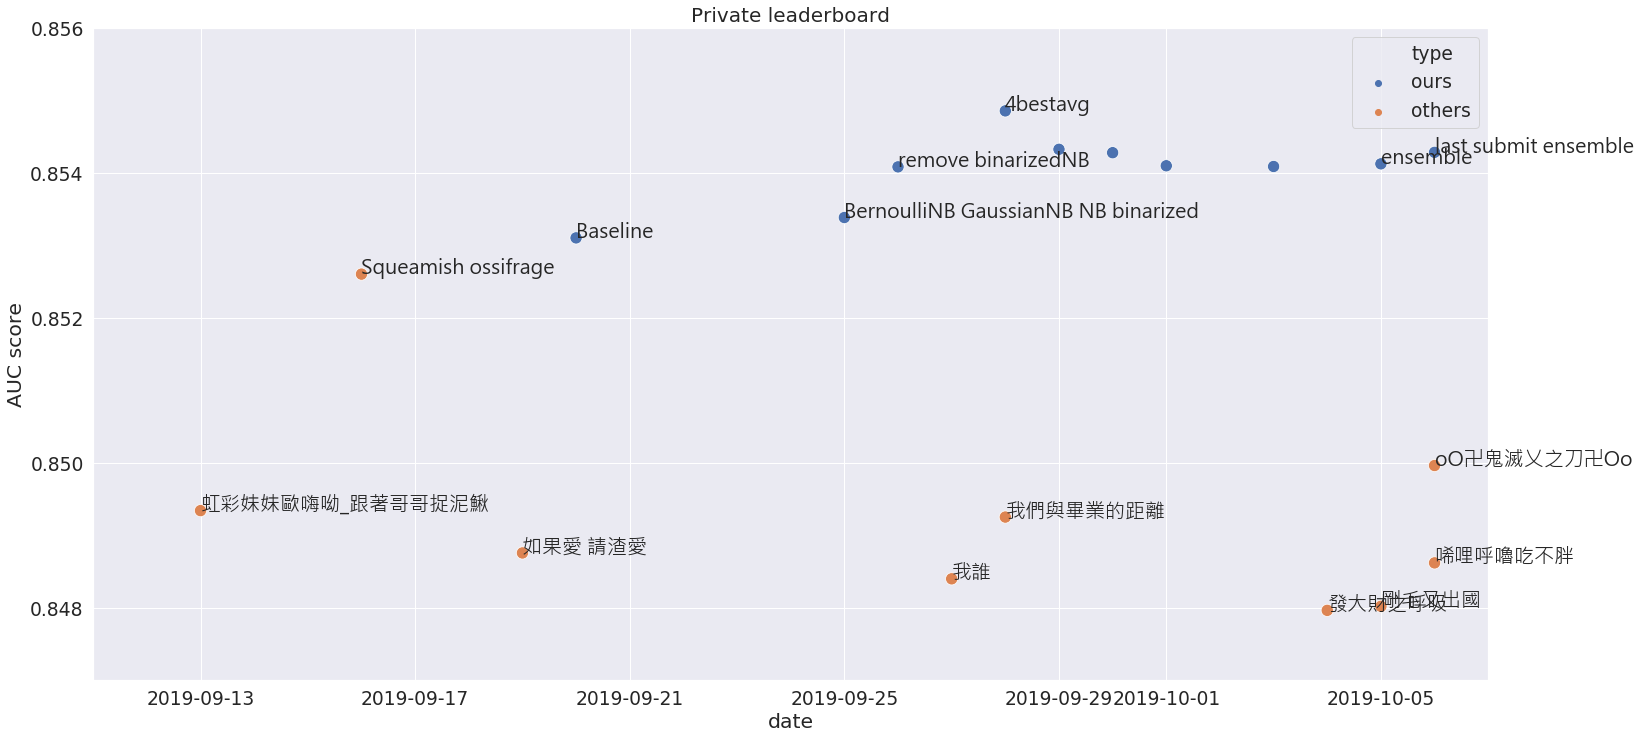

In [204]:

plt.figure(figsize=(25, 12))
sns.set(font_scale=1.7) 

ax=sns.scatterplot(x='date', y='AUC score',hue='type',data=All, s=150)
plt.xlim(datetime.datetime.strptime('2019/'+'9/11', "%Y/%m/%d").date(), datetime.datetime.strptime('2019/'+'10/7', "%Y/%m/%d").date())
plt.ylim(0.847,0.856)
for i in range(All.shape[0]):
    sns.set(font='Microsoft JhengHei')
    ax.text(All['date'][i],All['AUC score'][i],All['tag'][i],size=20)
# sns.lineplot(All['date'][:10], All['AUC score'][:10],markers=True)

plt.title('Private leaderboard',size=20)

In [183]:
TOOL_VISIT_1YEAR_CNT

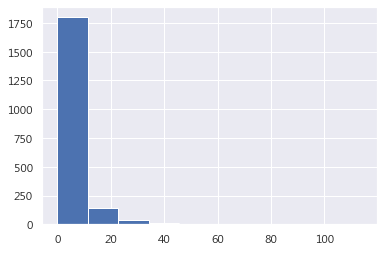

In [240]:
train['LR1s'][train['Y1']==1].hist()

([<matplotlib.axis.XTick at 0x7f2f2ef6a3c8>,
 <a list of 4 Text xticklabel objects>)

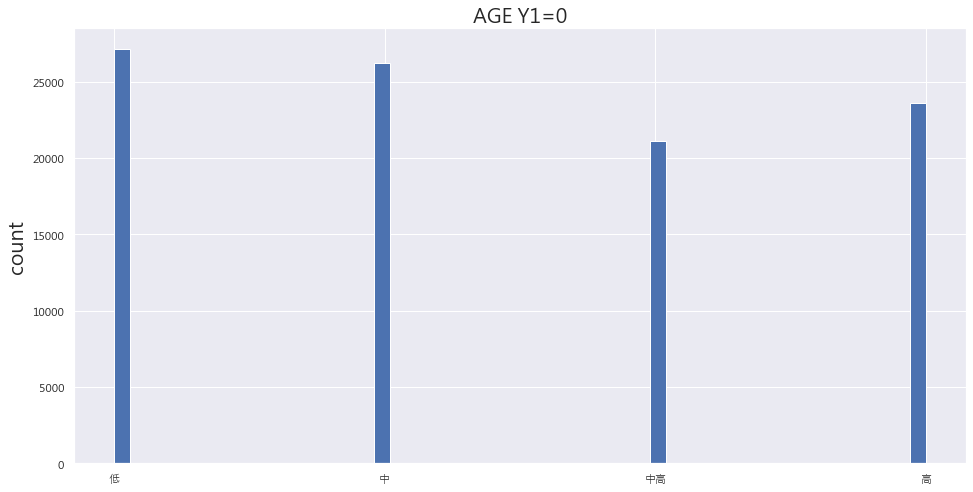

In [250]:
plt.figure(figsize=(16, 8))
train['AGE'][train['Y1']==0].hist(bins=50)
plt.title('AGE Y1=0',size=20)
plt.ylabel('count',size=20)
plt.xticks([1,2,3,4],['低','中','中高','高'])

([<matplotlib.axis.XTick at 0x7f2f2ea6be80>,
 <a list of 4 Text xticklabel objects>)

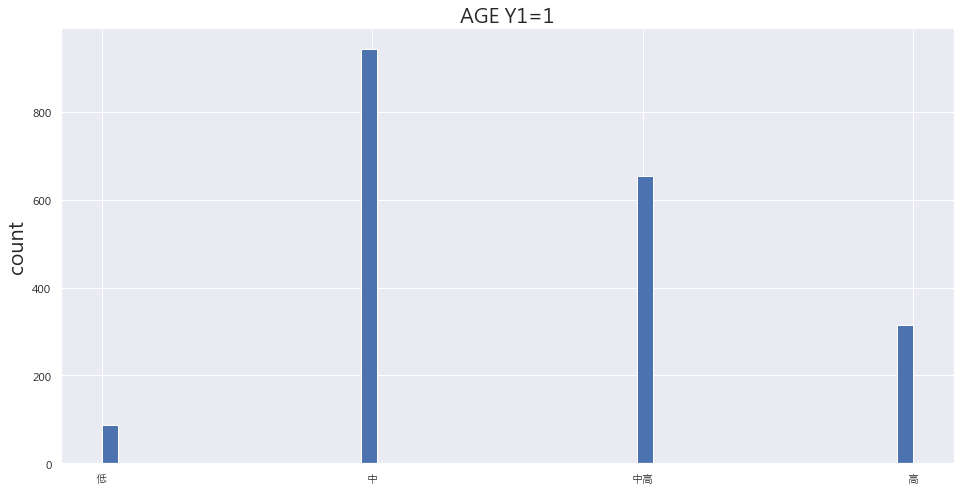

In [251]:
plt.figure(figsize=(16, 8))
train['AGE'][train['Y1']==1].hist(bins=50)
plt.title('AGE Y1=1',size=20)
plt.ylabel('count',size=20)
plt.xticks([1,2,3,4],['低','中','中高','高'])

Text(0.5, 1.0, 'ANNUAL_INCOME_AMT  Y1=0')

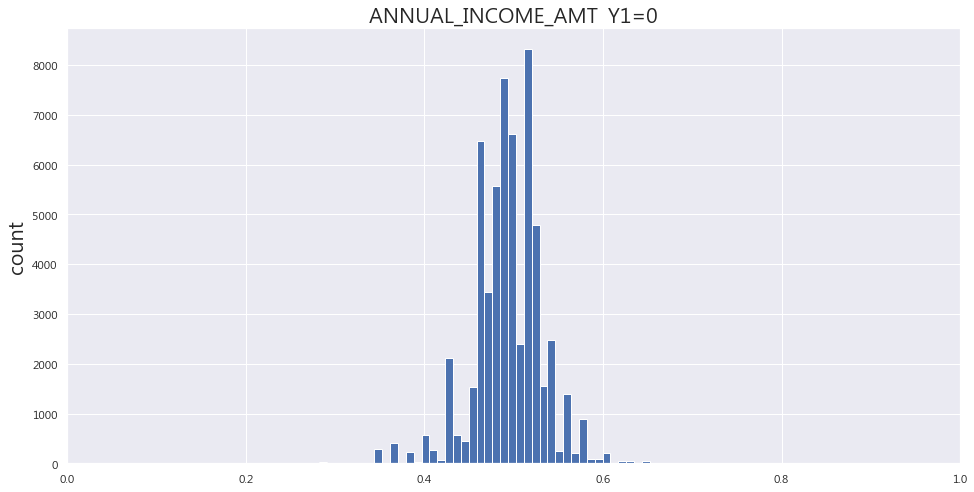

In [287]:
plt.figure(figsize=(16, 8))
train['ANNUAL_INCOME_AMT'][train['Y1']==0].hist(bins=100)
plt.xlim(0,1)
plt.ylabel('count',size=20)
plt.title('ANNUAL_INCOME_AMT  Y1=0',size=20)

Text(0.5, 1.0, 'ANNUAL_INCOME_AMT  Y1=1')

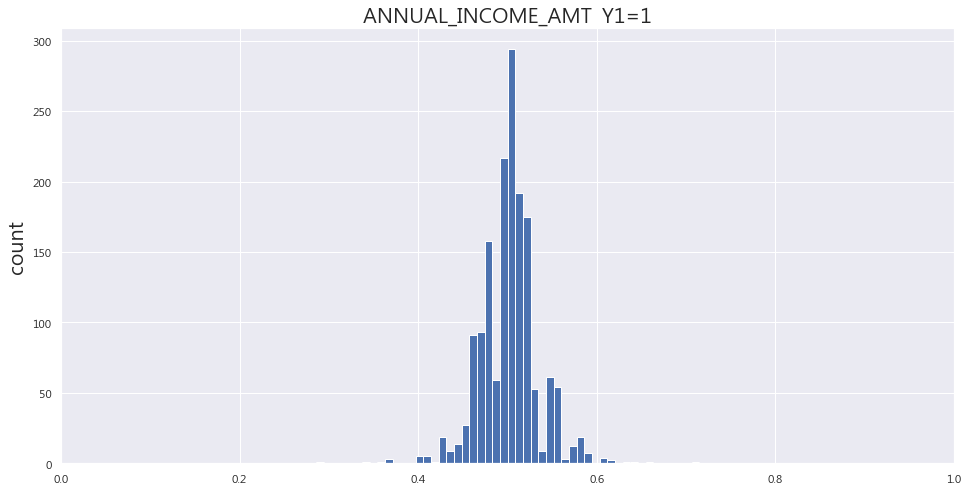

In [289]:
plt.figure(figsize=(16, 8))
train['ANNUAL_INCOME_AMT'][train['Y1']==1].hist(bins=50)
plt.xlim(0,1)
plt.ylabel('count',size=20)
plt.title('ANNUAL_INCOME_AMT  Y1=1',size=20)

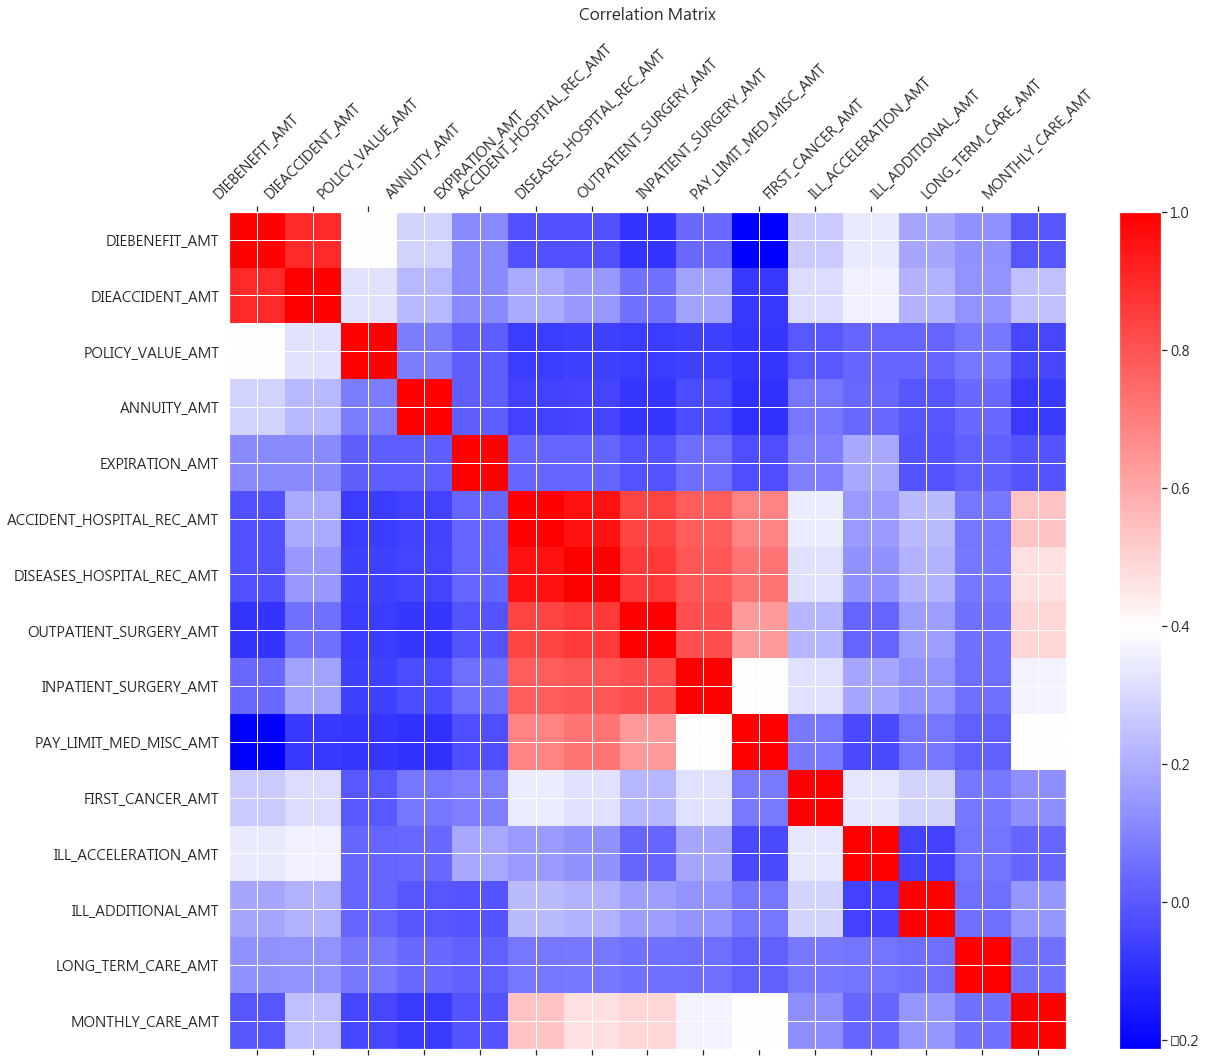

In [166]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train[pca_col].corr('spearman'), fignum=f.number,cmap='bwr')
plt.xticks(range(train[pca_col].shape[1]), train[pca_col].columns, fontsize=14, rotation=45)
plt.yticks(range(train[pca_col].shape[1]), train[pca_col].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', size=16,pad=150);

In [259]:
z=pd.read_csv('train.csv',encoding='big5').drop('CUS_ID',axis=1)
zz=pd.read_csv('test.csv',encoding='big5').drop('CUS_ID',axis=1)

In [261]:
with pd.option_context('display.max_rows', 200, 'display.max_columns', 10):
    display(z.isna().sum())

GENDER                         683
AGE                              0
CHARGE_CITY_CD                   0
CONTACT_CITY_CD                  0
EDUCATION_CD                 20562
MARRIAGE_CD                   7951
LAST_A_CCONTACT_DT               0
L1YR_A_ISSUE_CNT                 0
LAST_A_ISSUE_DT                  0
L1YR_B_ISSUE_CNT                 0
LAST_B_ISSUE_DT                  0
CHANNEL_A_POL_CNT                0
CHANNEL_B_POL_CNT                0
OCCUPATION_CLASS_CD           3960
APC_CNT                          0
INSD_CNT                         0
APC_1ST_AGE                  43282
INSD_1ST_AGE                   171
IF_2ND_GEN_IND                   0
APC_1ST_YEARDIF              43282
RFM_R                        43294
REBUY_TIMES_CNT              43282
LEVEL                        43305
RFM_M_LEVEL                  43282
LIFE_CNT                         0
IF_ISSUE_A_IND                   0
IF_ISSUE_B_IND                   0
IF_ISSUE_C_IND                   0
IF_ISSUE_D_IND      

In [239]:
len(root_col)

22

Text(0.5, 1.0, 'Y1 prediction')

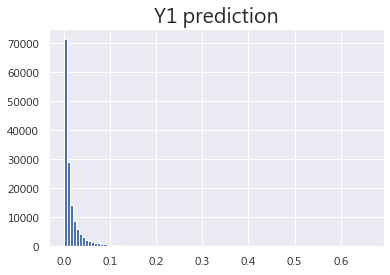

In [309]:
sample['Ypred'].hist(bins=100)
plt.title('Y1 prediction',size=20)

Text(0.5, 1.0, 'Private Leaderboard')

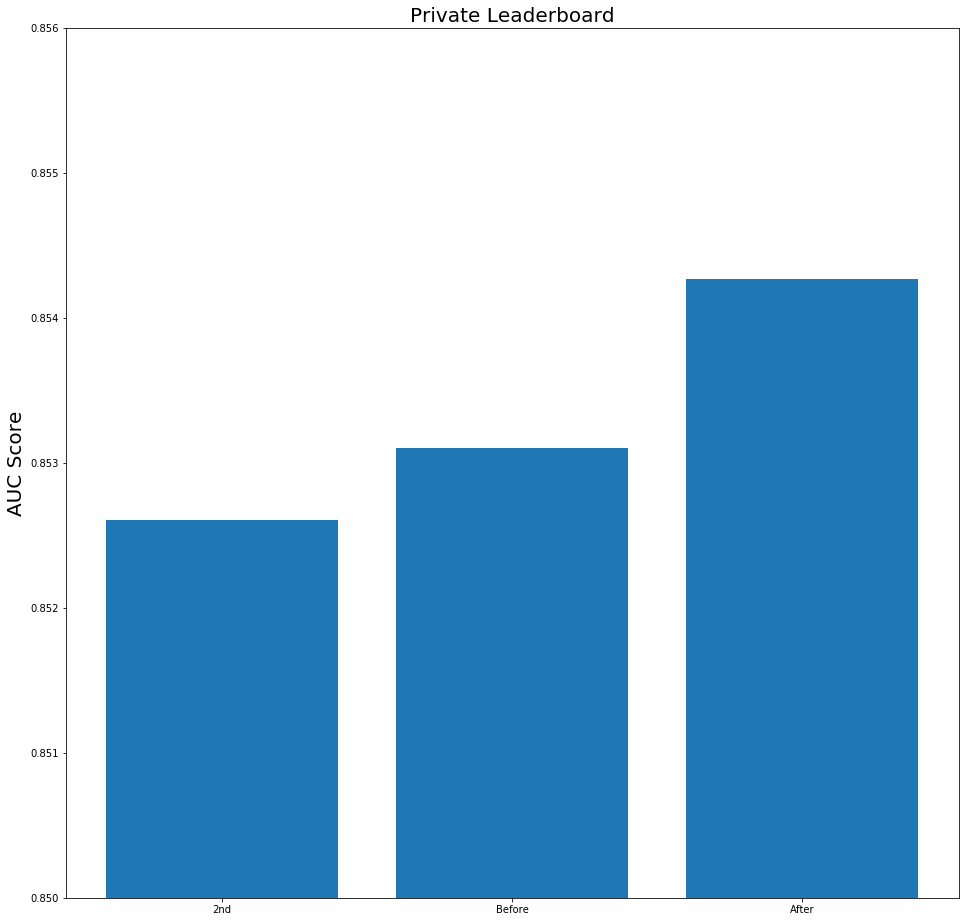

In [13]:
plt.figure(figsize=(16, 16))
plt.bar(['2nd','Before','After'],[0.852604,0.8531038927,0.854269137])
plt.ylim(0.85,0.856)
plt.ylabel('AUC Score',size=20)
plt.title('Private Leaderboard',size=20)